**PROJECT OBJECTIVE:** Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.


**Steps and tasks:**
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden 
patterns by using all possible methods.
2. Build a data driven model to rank all the players in the dataset using all or the most important performance features




**DATA DESCRIPTION:**  The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: 
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as warn
warn.filterwarnings('ignore')
from scipy.stats import zscore 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score


**Data loading and analysis**

In [2]:
cricket_data=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv',skip_blank_lines=True)
cricket_data.shape

(180, 7)

In [3]:
cricket_data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [5]:
cricket_data.isna().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [6]:
df=cricket_data.dropna(axis=0,how='any') # Drop the Rows with Nan Values 
df=df.reset_index(drop=True)  # Resets the index and removes the old index from the dataframe 
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [7]:
df.shape

(90, 7)

In [8]:
df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


**EDA and visualisation**

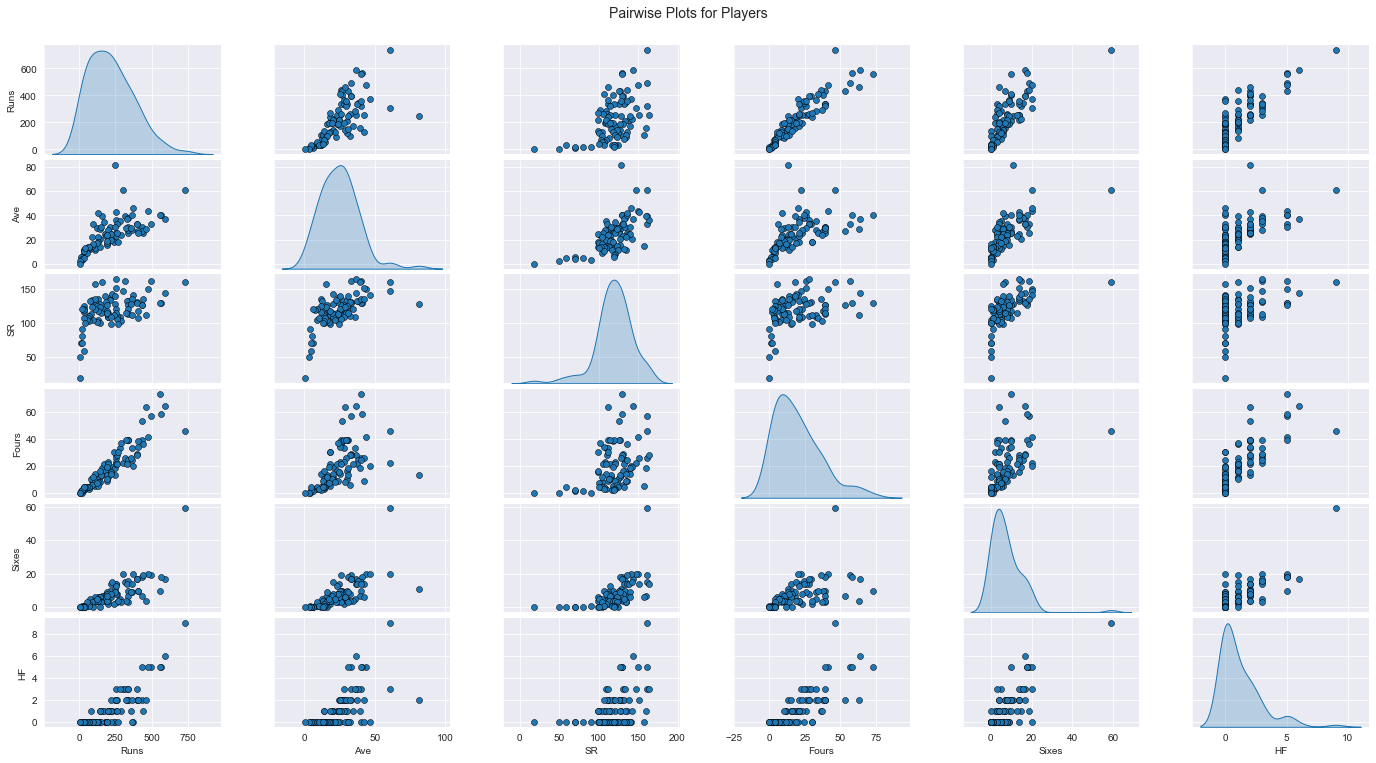

In [9]:
players=df['Name']
stats=df.iloc[:,1:]
cols = ['Runs','Ave','SR','Fours','Sixes','HF']
pp = sns.pairplot(stats[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True));

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3);
t = fig.suptitle('Pairwise Plots for Players', fontsize=14);


**There is a strong co-relation between Average of the players,Runs scored and number of fours, Sixes and Strike Rate of the players**

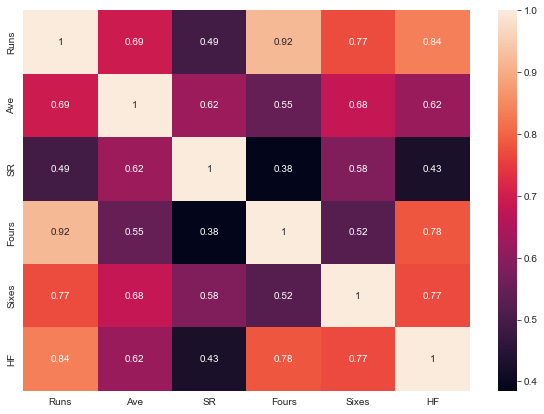

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data=stats.corr(),annot=True,fmt='.2g');

The co-relation becomes more clear from the heatmap as we can draw following conclusions:

* Most of the runs are scored by hitting Fours
* Players with better average tend to have hit more number of sixes 
* Strike Rate seems to be have increased with increase in the average, although the number of fours contribute less towards increase in strike rate.
* Half centuries generally are contributed by increasing number of fours and sixes, However there is not strong relation between strike rate and the number of half-centuries, meaning player might have hit the half centuries in the death overs or he might be out after hitting the half century.

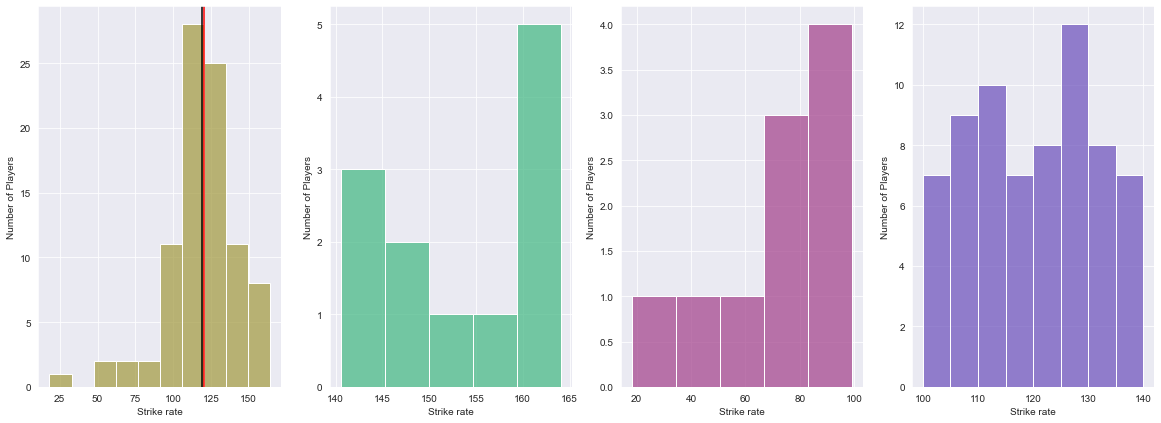

In [11]:
#Strike Rate Analysis
plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
ax=sns.histplot(stats['SR'],color='#a69e49',bins=10,stat='count');
plt.axvline(stats['SR'].median(),color='red')
plt.axvline(stats['SR'].mean(),color='black')
ax.set_xlabel('Strike rate');
ax.set_ylabel('Number of Players');
SR_over_140=stats[stats['SR']>140]
SR_below_100=stats[stats['SR']<100]
SR_above_100=stats[stats['SR']<=140][stats['SR']>=100]
plt.subplot(1,4,2)
ax=sns.histplot(data=SR_over_140,x='SR',color='#4aba88',stat='count');
ax.set_xlabel('Strike rate');
ax.set_ylabel('Number of Players');
plt.subplot(1,4,3)
ax=sns.histplot(data=SR_below_100,x='SR',color='#a64990',stat='count');
ax.set_xlabel('Strike rate');
ax.set_ylabel('Number of Players');
plt.subplot(1,4,4)
ax=sns.histplot(data=SR_above_100,x='SR',color='#7258bf',stat='count');
ax.set_xlabel('Strike rate');
ax.set_ylabel('Number of Players');

* The Strike rate is almost equally distributed, mean and median are almost at same 
* Majority of the Players have an Strike in range 100-140
* generally it is considered that players with Strike rate above 140 is a most run scorer, So for our Analysis we can easily say that 12 players have Strike rate above 140. 
* 10 Players have the lowest of the Strike rates
* As evident from the figure 4 it is clear that nearly 68 players have good Strike Rate.


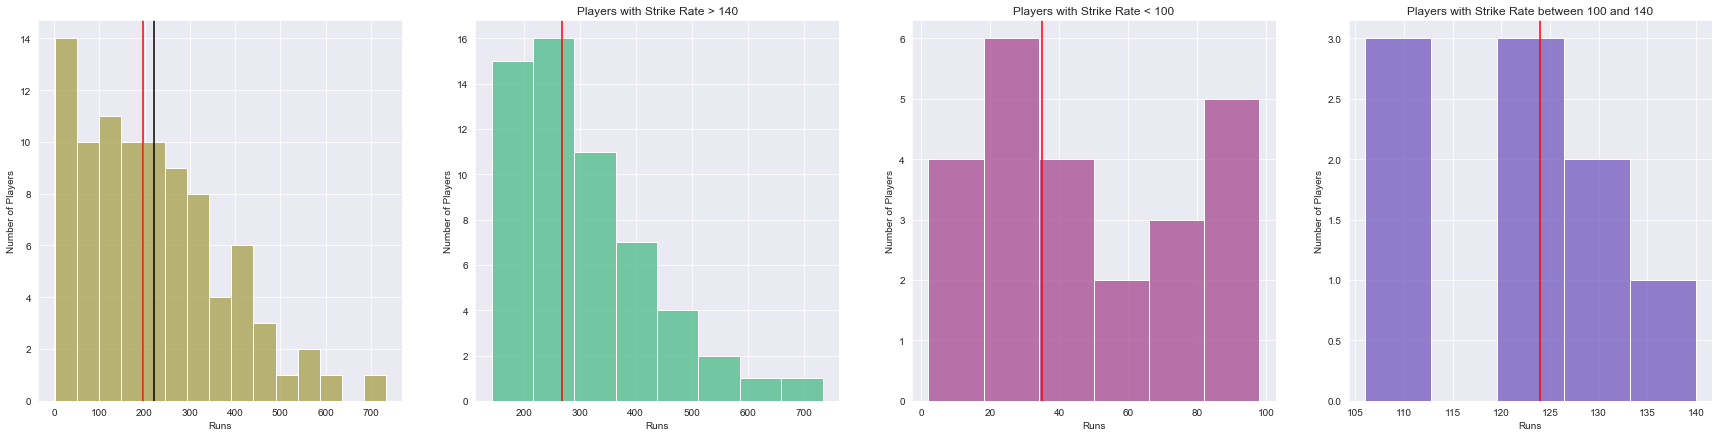

In [12]:
#Runs Analysis
plt.figure(figsize=(30,7))
plt.subplot(1,4,1)
ax=sns.histplot(data=stats,x='Runs',color='#a69e49',bins=15,stat='count');
plt.axvline(stats['Runs'].median(),color='red')
plt.axvline(stats['Runs'].mean(),color='black')
ax.set_xlabel('Runs');
ax.set_ylabel('Number of Players');
SR_over_140=stats[stats['Runs']>140]
SR_below_100=stats[stats['Runs']<100]
SR_above_100=stats[stats['Runs']<=140][stats['Runs']>=100]
plt.subplot(1,4,2)
ax=sns.histplot(data=SR_over_140,x='Runs',color='#4aba88',stat='count');
plt.axvline(SR_over_140['Runs'].median(),color='red')
ax.set_xlabel('Runs');
ax.set_ylabel('Number of Players');
ax.set_title('Players with Strike Rate > 140');
plt.subplot(1,4,3)
ax=sns.histplot(data=SR_below_100,x='Runs',color='#a64990',stat='count');
plt.axvline(SR_below_100['Runs'].median(),color='red')
ax.set_xlabel('Runs');
ax.set_ylabel('Number of Players');
ax.set_title('Players with Strike Rate < 100');
plt.subplot(1,4,4)
ax=sns.histplot(data=SR_above_100,x='Runs',color='#7258bf',stat='count');
plt.axvline(SR_above_100['Runs'].median(),color='red')
ax.set_xlabel('Runs');
ax.set_ylabel('Number of Players');
ax.set_title('Players with Strike Rate between 100 and 140');

* A clear co-relation could be seen in the Strike rate and Runs scored by players.
* Nearly 57 Players have scored between 180 and 700 with Strike rate more than 140
* Players with strike Rate between 100 and 140 are just 9

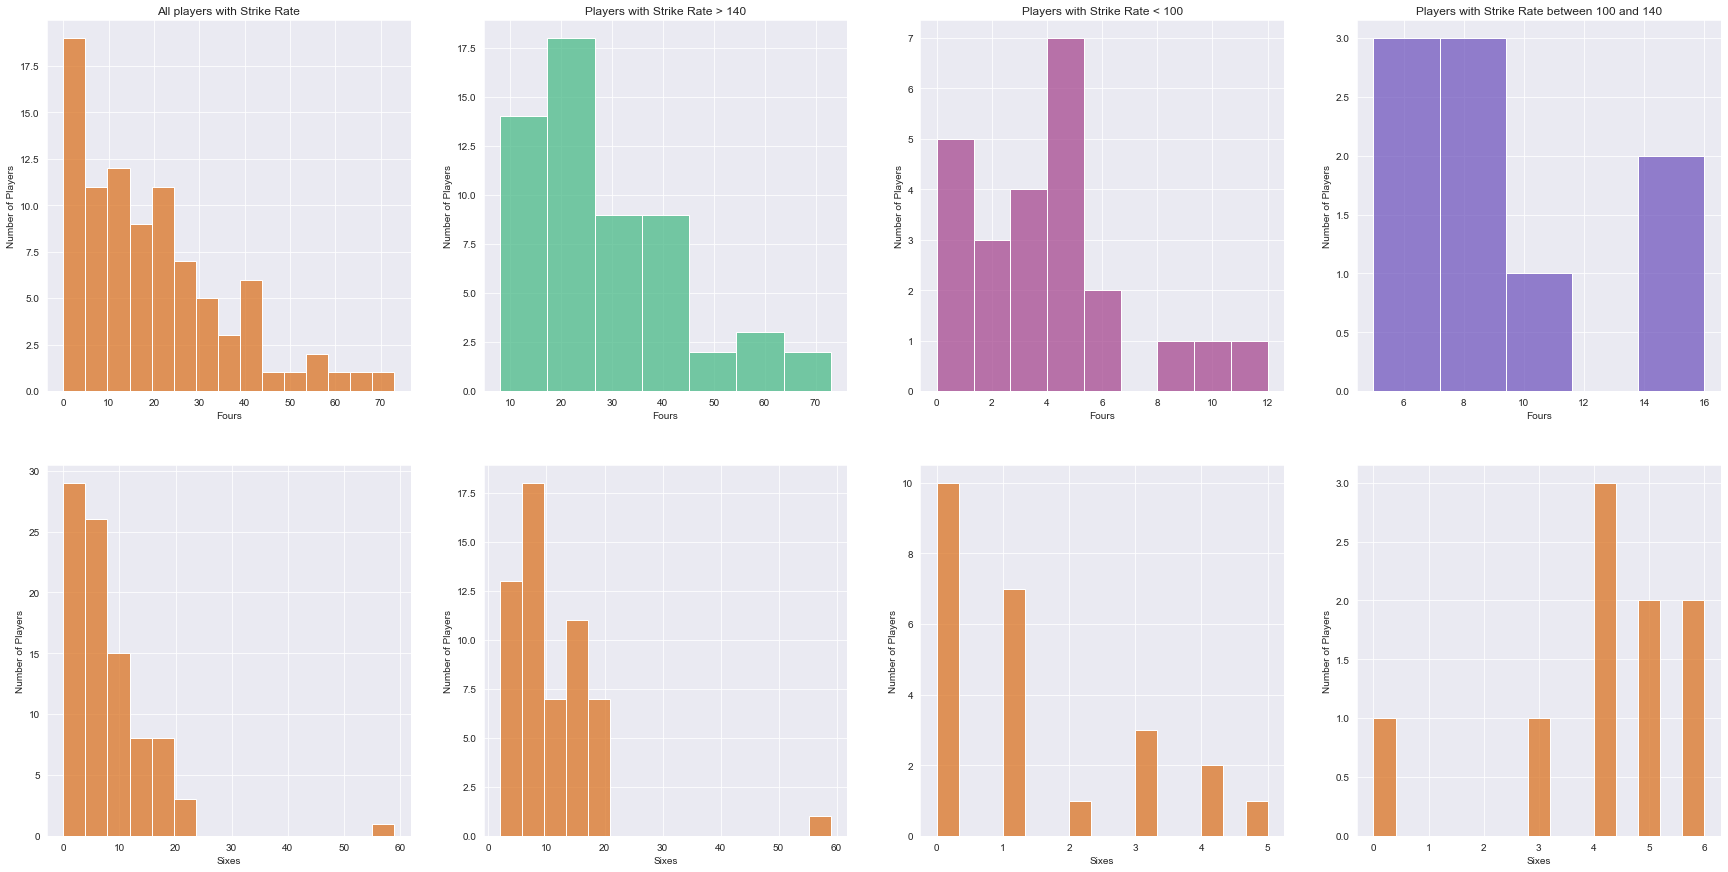

In [13]:
#Fours/Sixes Analysis
plt.figure(figsize=(30,15))
plt.subplot(2,4,1)
ax=sns.histplot(data=stats,x='Fours',color='#db7323',bins=15,stat='count');
ax.set_title('All players with Strike Rate');
ax.set_xlabel('Fours');
ax.set_ylabel('Number of Players');
SR_over_140=stats[stats['Runs']>140]
SR_below_100=stats[stats['Runs']<100]
SR_above_100=stats[stats['Runs']<=140][stats['Runs']>=100]
plt.subplot(2,4,2)
ax=sns.histplot(data=SR_over_140,x='Fours',color='#4aba88',stat='count');
ax.set_xlabel('Fours');
ax.set_ylabel('Number of Players');
ax.set_title('Players with Strike Rate > 140');
plt.subplot(2,4,3)
ax=sns.histplot(data=SR_below_100,x='Fours',color='#a64990',stat='count');
ax.set_xlabel('Fours');
ax.set_ylabel('Number of Players');
ax.set_title('Players with Strike Rate < 100');
plt.subplot(2,4,4)
ax=sns.histplot(data=SR_above_100,x='Fours',color='#7258bf',stat='count');
ax.set_xlabel('Fours');
ax.set_ylabel('Number of Players');
ax.set_title('Players with Strike Rate between 100 and 140');
plt.subplot(2,4,5)
ax=sns.histplot(data=stats,x='Sixes',color='#db7323',bins=15,stat='count');
ax.set_xlabel('Sixes');
ax.set_ylabel('Number of Players');
plt.subplot(2,4,6)
ax=sns.histplot(data=SR_over_140,x='Sixes',color='#db7323',bins=15,stat='count');
ax.set_xlabel('Sixes');
ax.set_ylabel('Number of Players');
plt.subplot(2,4,7)
ax=sns.histplot(data=SR_below_100,x='Sixes',color='#db7323',bins=15,stat='count');
ax.set_xlabel('Sixes');
ax.set_ylabel('Number of Players');
plt.subplot(2,4,8)
ax=sns.histplot(data=SR_above_100,x='Sixes',color='#db7323',bins=15,stat='count');
ax.set_xlabel('Sixes');
ax.set_ylabel('Number of Players');

We can draw following conclusions:


*   Runs are scored mostly by Hitting large number of fours as compared to the sixes.
*   Players with Strike Rate more than 140 have scored around 56 fours with more maximum number of fours are around 10-40 fours and around 57 sixes and there are likely 1 to 20 sixes to be hit majorly.
* Players with strike rate below 100 are more likely to score runs by hitting 4-5 fours and 1 - 4 sixes.
* Players with strike rate between 100-140 have score their runs by hitting around 6-8 fours and max of 4-5 sixes.



**Ranking Model**

In [14]:
stats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


**The means of the labels are highly unequal and therefore it needs to be scaled for the model or as a result, the clusters will be biased and they will be made mostly around players with more number of runs.**

In [15]:
scale=stats.apply(zscore)

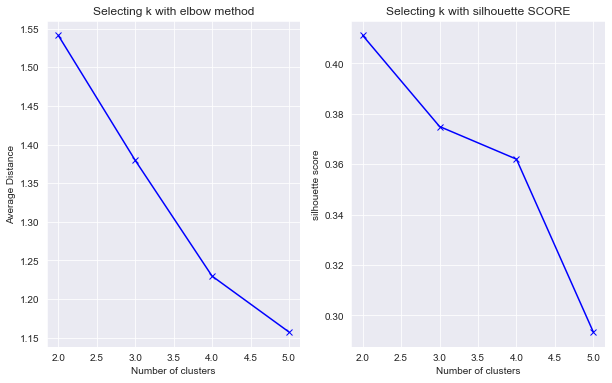

In [16]:
clusters=[2,3,4,5]
distortions=[]
silhouettes=[]
for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(scale)
  prediction=model.predict(scale)
  dist=cdist(scale,model.cluster_centers_,'euclidean') #Calculates the distance between centroid to each of the points.
  mindist=np.min(dist,axis=1) #Minimum distance between centroid to each point.
  distortions.append(sum(mindist)/scale.shape[0]) #Calculating Mean distortion

#Plotting for Mean cluster distance per cluster combination.

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(clusters,distortions,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Average Distance')
plt.title('Selecting k with elbow method');

plt.subplot(1,2,2)
clusters=[2, 3, 4, 5]
for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(scale)
  cluster_labels = model.labels_
  silhouettes.append(silhouette_score(scale,cluster_labels))

plt.plot(clusters,silhouettes,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette SCORE');


* From the elbow we can possibly make out a distinct elbow around 4 but comparing with the silhoutte score, it is clear that for 3 clusters, the score starts decling swiftly and goes near 0.20 for 4 clusters so it should be avoided as the inter clusters distance is also getting closer.
* Also evident from the distribution graph for the labels, we could see a prominenet 3 peaks indication 3 clusters minimum, So we decide for the final model as 3 clustered model.

In [17]:
stats_model=KMeans(n_clusters=3) #Selecting K-Means for 3 cluster.
stats_model.fit(scale); #Fitting Model into 3 clusters

stats['Ranking']=stats_model.labels_
df['Ranking']=stats_model.labels_
df['Ranking'].value_counts()

1    49
2    34
0     7
Name: Ranking, dtype: int64

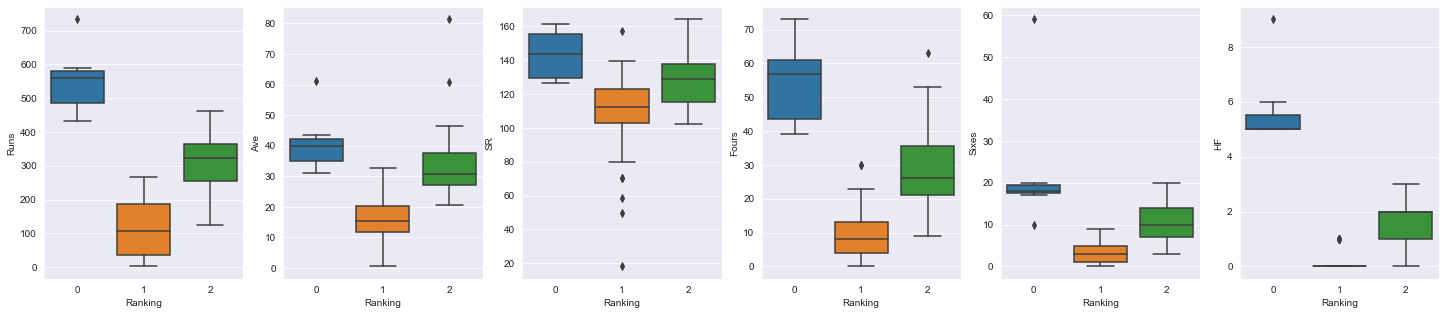

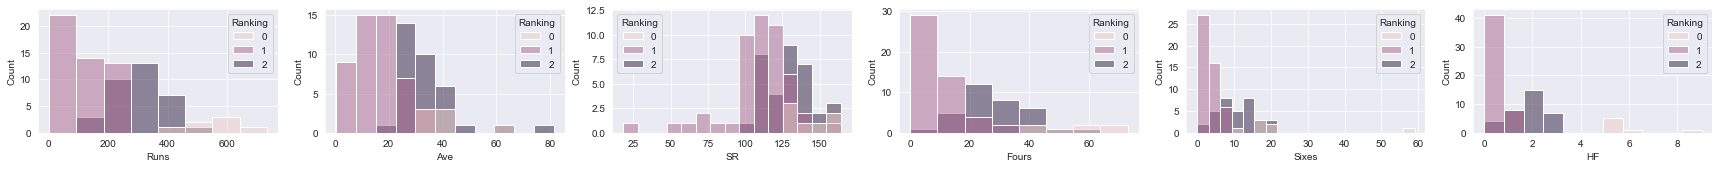

In [18]:
cols=['Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF']
plt.figure(figsize=(25,5))
for i in range(0,len(cols)):
  plt.subplot(1,6,i+1)
  sns.boxplot(data=stats,y=cols[i],x='Ranking');

cols=['Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF']
plt.figure(figsize=(30,5))
for i in range(0,len(cols)):
  plt.subplot(2,6,i+1)
  sns.histplot(data=stats,x=cols[i],hue='Ranking');


**Final Ranking Model Conclusion :**


*   Cluster 2 is clearly the best performing group, Players have score relatively around 450-700+ runs. The Average is relatively around the range 30-40. Strike rate is better than other two clusters, around 130-160 for majority of the players. The players in this category have hit around 45-60 Fours. Number of Sixes are densely around 20. The Players in this category have scored relatively large number of Half centuries. We can easily cluster this group as **Best**
*   Cluster 0 has relatively average Players who have scored around 120-470, Similarly their average is between 20-50 with two players who have average more than the rest of the Players in the Cluster. Majority of the Batsman have Strike rate in 115-140, Number of fours and Sixes are between 10-50 and 2-20 respectively. We can easily this Group as **Average**
*  Cluster 1 seems to have perform poor in all the segments as compared to all other clusters. So clearly we can group them into **Poor**



**Final Dataframe**

In [19]:
df.replace({'Ranking':2},'Best',inplace=True)
df.replace({'Ranking':0},'Average',inplace=True)
df.replace({'Ranking':1},'Poor',inplace=True)
df.head()


,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Average
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Average
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Average
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Average
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Average
